# Predictive Modeling of Property Sale Requisitions

## Exploratory notebook
This notebook contains an initial exploration of the dataset, with the aim of generating and identifying the different data and links needed to achieve the objective.

### Necessary libraries imports

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

from IPython.display import display

### Load datasets (2)

In [13]:
# Source path
data_path = "../data/raw/"

# Create the two dataframes from the csv

df_poursuites = pd.read_csv(os.path.join(data_path, "06_02_conjoncture_poursuites.csv"),sep=";", encoding="utf-8")
df_vacants = pd.read_csv(os.path.join(data_path, "09_03_log_vacants_taux_des_1975.csv"),sep=";",encoding="utf-8")

# Print first 10 rows
display(df_poursuites.head(n=10))
display(df_vacants.head(n=10))

,Date,District Id,District,Bezirk,Réquisitions de poursuite,Réquisitions de continuer la poursuite,Réquisitions de vente,Actes de défaut de biens
0,2025-07,1001,Broye,Broye,1328,883,4,353
1,2025-06,1001,Broye,Broye,1319,1257,8,638
2,2025-05,1001,Broye,Broye,1589,1115,17,506
3,2025-01,1001,Broye,Broye,812,1547,11,495
4,2024-08,1001,Broye,Broye,1314,1611,15,526
5,2024-05,1001,Broye,Broye,1128,1150,33,543
6,2023-11,1001,Broye,Broye,1055,1247,23,608
7,2023-10,1001,Broye,Broye,1144,1470,2,759
8,2023-09,1001,Broye,Broye,1752,996,7,656
9,2023-07,1001,Broye,Broye,926,691,5,354


,Année,District id,District,Bezirk,Commune id hist.,Commune id,Commune,Parc de logements au 31 décembre,Nombre de logements vacants,Taux de logements vacants en %
0,1975,1001,Broye,Broye,12055,2022,Gletterens,69,0,0.00
1,1975,1001,Broye,Broye,12549,2035,Nuvilly,87,0,0.00
2,1975,1001,Broye,Broye,12991,2043,Sévaz,27,0,0.00
3,1975,1002,Glâne,Glane,12113,2079,Grangettes,39,0,0.00
4,1975,1002,Glâne,Glane,12611,2067,Le Châtelard,111,2,1.80
5,1975,1002,Glâne,Glane,14103,2063,Billens-Hennens,123,0,0.00
6,1975,1002,Glâne,Glane,14137,2114,Villorsonnens,241,0,0.00
7,1975,1002,Glâne,Glane,14476,2087,Mézières (FR),175,0,0.00
8,1975,1002,Glâne,Glane,14477,2099,Siviriez,416,8,1.92
9,1975,1002,Glâne,Glane,14480,2113,Vuisternens-dev-Romont,437,7,1.60


In [34]:
# Print column infos
display(df_poursuites.info())
display(df_vacants.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667 entries, 0 to 2666
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Date                                    2667 non-null   object
 1   district_id                             2667 non-null   int64 
 2   District                                2667 non-null   object
 3   Bezirk                                  2667 non-null   object
 4   Réquisitions de poursuite               2667 non-null   int64 
 5   Réquisitions de continuer la poursuite  2667 non-null   int64 
 6   Réquisitions de vente                   2667 non-null   int64 
 7   Actes de défaut de biens                2667 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 166.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6050 entries, 0 to 6049
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Année                             6050 non-null   int64  
 1   district_id                       6050 non-null   int64  
 2   District                          6050 non-null   object 
 3   Bezirk                            6050 non-null   object 
 4   Commune id hist.                  6050 non-null   int64  
 5   Commune id                        6050 non-null   int64  
 6   Commune                           6050 non-null   object 
 7   Parc de logements au 31 décembre  6050 non-null   int64  
 8   Nombre de logements vacants       6050 non-null   int64  
 9   Taux de logements vacants en %    6050 non-null   float64
dtypes: float64(1), int64(6), object(3)
memory usage: 472.8+ KB


None

In [14]:
# Print column stats infos (overview of data)
display(df_poursuites.describe())
display(df_vacants.describe())

,District Id,Réquisitions de poursuite,Réquisitions de continuer la poursuite,Réquisitions de vente,Actes de défaut de biens
count,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000
mean,1004.000000,1169.576678,949.199850,28.539183,460.641545
std,2.000375,1031.917576,867.930693,29.045575,467.553270
min,1001.000000,0.000000,0.000000,0.000000,0.000000
25%,1002.000000,556.000000,437.000000,10.000000,181.000000
50%,1004.000000,783.000000,627.000000,19.000000,303.000000
75%,1006.000000,1269.500000,1023.500000,36.000000,543.500000
max,1007.000000,6341.000000,5297.000000,344.000000,2800.000000


,Année,District id,Commune id hist.,Commune id,Parc de logements au 31 décembre,Nombre de logements vacants,Taux de logements vacants en %
count,6050.00000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000
mean,2000.34000,1003.710744,13273.000000,2183.347107,887.422975,10.694545,1.091294
std,14.66765,1.792870,1716.543371,95.569891,1890.289404,34.224023,1.448554
min,1975.00000,1001.000000,10162.000000,2008.000000,15.000000,0.000000,0.000000
25%,1988.00000,1002.000000,11978.000000,2115.000000,235.000000,0.000000,0.000000
50%,2000.50000,1004.000000,13080.000000,2177.000000,430.500000,3.000000,0.660000
75%,2013.00000,1005.000000,14481.000000,2271.000000,844.000000,9.000000,1.490000
max,2025.00000,1007.000000,16662.000000,2338.000000,22765.000000,809.000000,15.150000


The pandas describe() method provides a statistical summary of the numerical variables in a dataset, including count, mean, standard deviation, and minimum and maximum values. <br>

- In the case of the Poursuites dataset, the statistics show strong variability between districts and over time, with some observations equal to zero and others very high, indicating possible outliers or significant economic fluctuations.

- For the Logements vacants dataset, the values describe a broad period (1975–2025) with an average vacancy rate of around 1%, consistent with the Swiss reality, but with some outliers above 10%.


### Observations

Because it brings together complementary viewpoints on the same economic reality, combining the two datasets is beneficial. <br>
While the Vacants dataset offers structural information about housing market conditions, the Poursuites dataset uses monthly debt collection activity to capture short-term financial distress.<br> 
By linking them, it is possible to analyze how financial tension and real estate dynamics interact across the different districts and time.

Note that the two datasets have different temporal granularities, where:
- The **poursuites** dataset is monthly, with one row for each month × district.
- The **vacants** dataset is annual, with one row for each year × district.

The common key district_id and the corresponding year will be used to merge the two datasets. While maintaining the original temporal resolution of both sources, this method ensures that each monthly observation inherits the contextual information of its district and year, linking the monthly financial indicators of the Poursuites dataset with the annual vacancy data of the Vacants dataset.

### Checking missing values

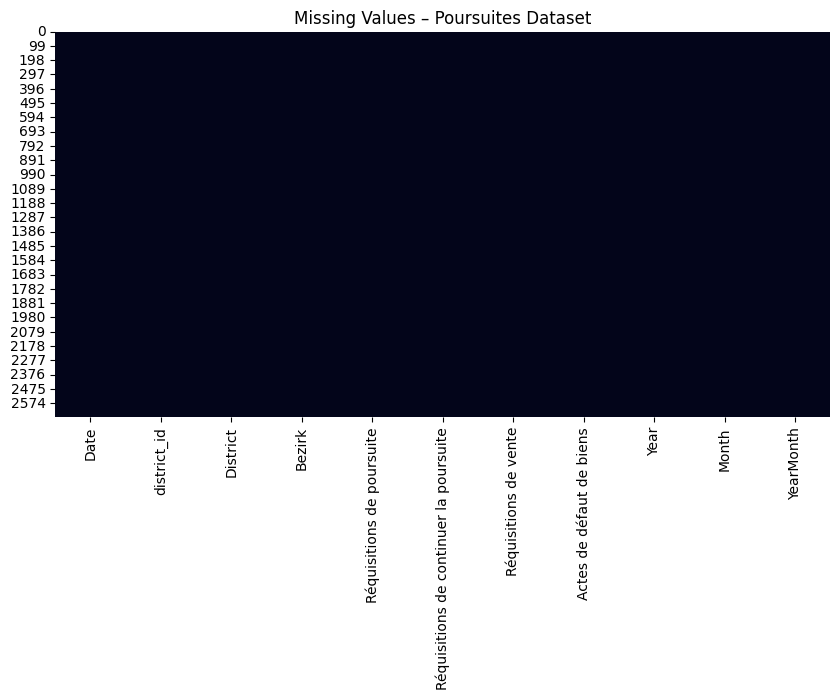

Date                                      0
district_id                               0
District                                  0
Bezirk                                    0
Réquisitions de poursuite                 0
Réquisitions de continuer la poursuite    0
Réquisitions de vente                     0
Actes de défaut de biens                  0
Year                                      0
Month                                     0
YearMonth                                 0
dtype: int64

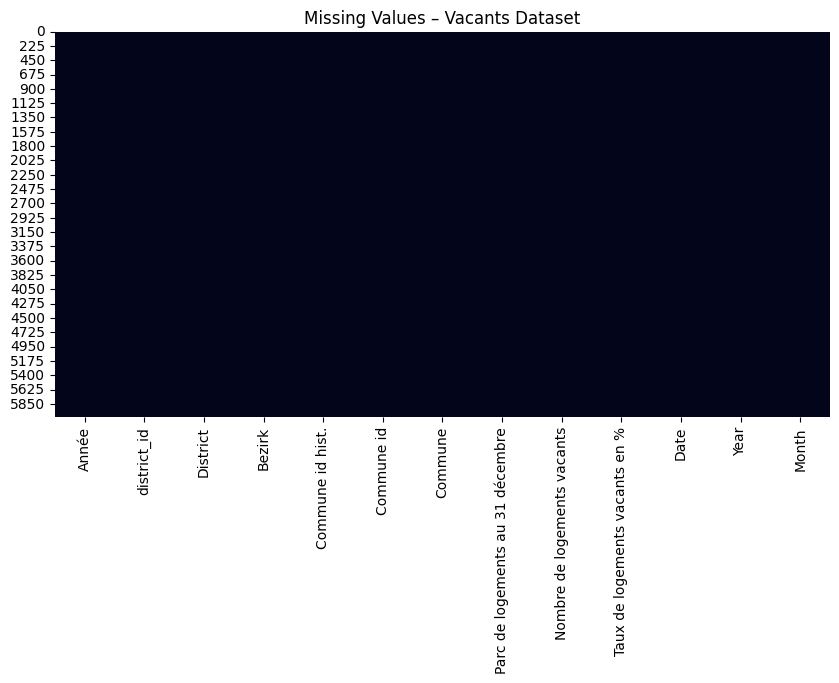

Année                               0
district_id                         0
District                            0
Bezirk                              0
Commune id hist.                    0
Commune id                          0
Commune                             0
Parc de logements au 31 décembre    0
Nombre de logements vacants         0
Taux de logements vacants en %      0
Date                                0
Year                                0
Month                               0
dtype: int64

In [63]:
import matplotlib.pyplot as plt

# Plot quantity of missing values in columns (white = missing value)
plt.figure(figsize=(10,5))
sns.heatmap(df_poursuites.isnull(), cbar=False)
plt.title("Missing Values – Poursuites Dataset")
plt.show()
display(df_poursuites.isna().sum())

plt.figure(figsize=(10,5)) 
sns.heatmap(df_vacants.isnull(), cbar=False) 
plt.title("Missing Values – Vacants Dataset") 
plt.show()
display(df_vacants.isna().sum())

The two datasets do not contain any missing data, so no specific processing or replacement will be necessary.

### Evolution of monthly sale requisitions across all districts

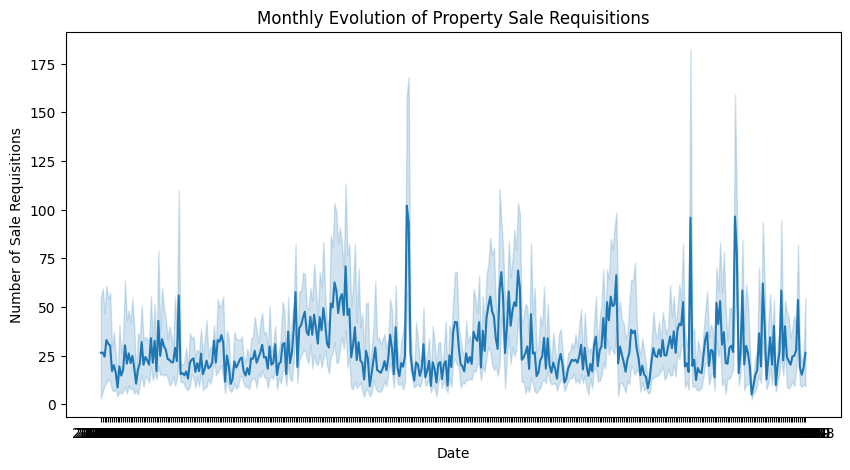

In [22]:
plt.figure(figsize=(10,5))

# Plot the monthly trend of sale requisitions over time
sns.lineplot(data=df_poursuites, x="Date", y="Réquisitions de vente")

# Add plot titles
plt.title("Monthly Evolution of Property Sale Requisitions")
plt.xlabel("Date")
plt.ylabel("Number of Sale Requisitions")


plt.show()


### Compare trends across districts

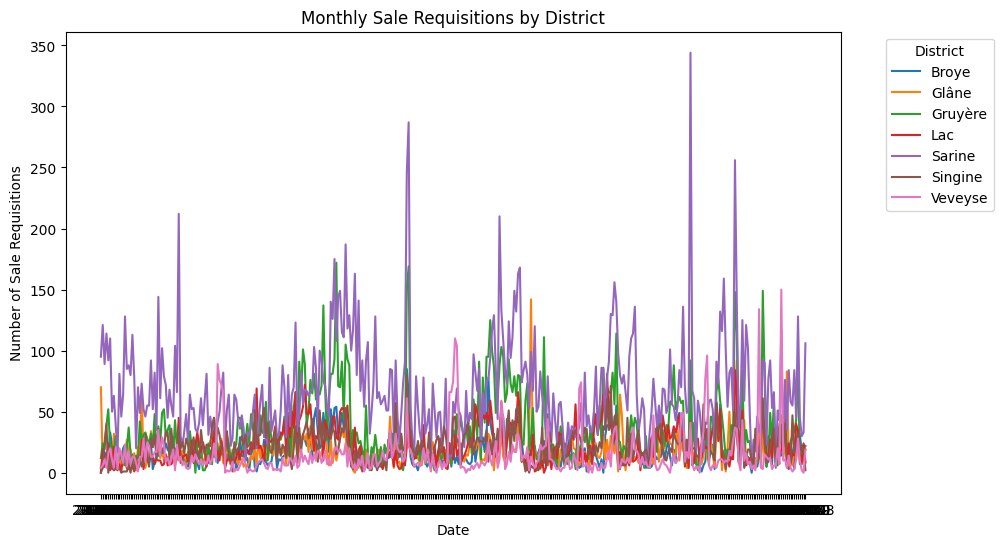

In [23]:
plt.figure(figsize=(10,6))

# Plot the monthly sale requisitions for each district
sns.lineplot(data=df_poursuites, x="Date", y="Réquisitions de vente", hue="District")

# Add plot titles
plt.title("Monthly Sale Requisitions by District")
plt.xlabel("Date")
plt.ylabel("Number of Sale Requisitions")
plt.legend(title="District", bbox_to_anchor=(1.05, 1), loc="upper left") # Position the legend outside the plot area

plt.show()


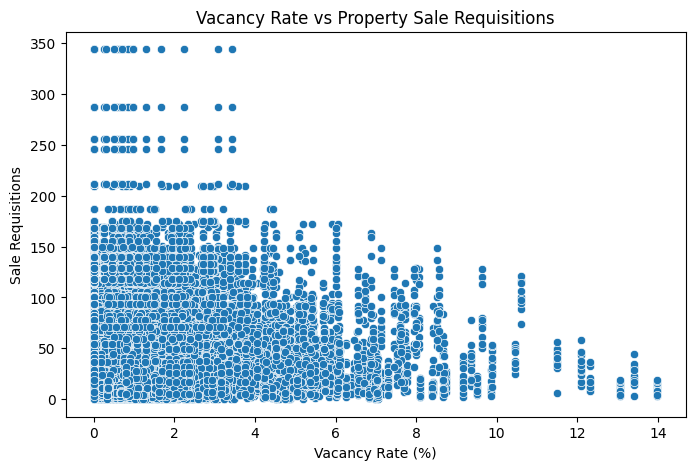

In [64]:
plt.figure(figsize=(8,5))

# Plot the relationship between vacancy rate and sale requisitions
sns.scatterplot(data=df_merged, x='Taux de logements vacants en %', y='Réquisitions de vente') # scatter --> see distributions

# Add plot titles
plt.title("Vacancy Rate vs Property Sale Requisitions")
plt.xlabel("Vacancy Rate (%)")
plt.ylabel("Sale Requisitions")

plt.show()

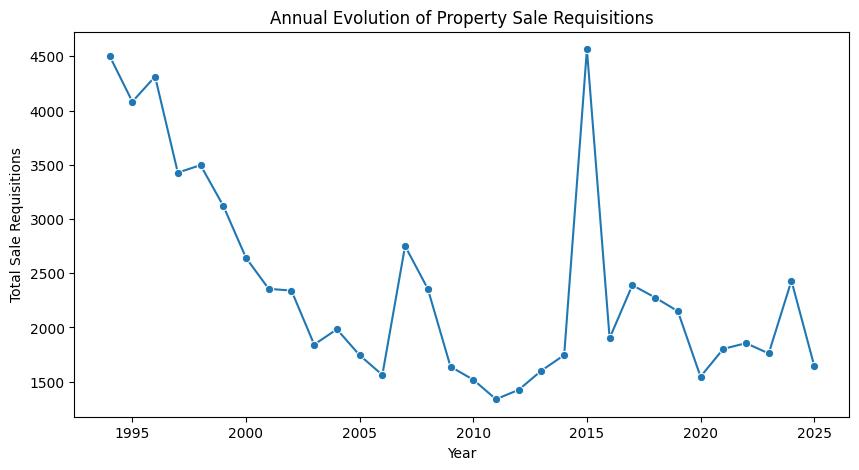

In [65]:
# Extract the year from the Date column
df_poursuites['Year'] = df_poursuites['Date'].dt.year

# Total number of sales requisitions per year.
yearly = df_poursuites.groupby('Year')['Réquisitions de vente'].sum().reset_index()

plt.figure(figsize=(10,5))
# Plot the total number of sale requisitions by year
sns.lineplot(data=yearly, x='Year', y='Réquisitions de vente', marker='o')

# Add plot titles
plt.title("Annual Evolution of Property Sale Requisitions")
plt.xlabel("Year")
plt.ylabel("Total Sale Requisitions")

plt.show()

### Conclusions

The exploratory analysis reveals consistent and complete data across both sources, with no missing values.<br>
Temporal visualizations highlight cyclical patterns in property sale requisitions and clear differences across districts, reflecting local economic variability.<br>
The yearly trend suggests a gradual increase in sale requisitions, while the comparison with housing vacancy rates indicates a weak inverse relationship between housing market stability and financial distress.<br>
These findings confirm the dataset’s suitability for time-series modeling to predictive tasks.